In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_columns = None

In [3]:
df=pd.read_csv('gaiadatawithnearby.csv')

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_85909/819377039.py:1: DtypeWarning: Columns (6,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('gaiadatawithnearby.csv')


In [4]:
df.drop(columns='ourgaiaids_oid', inplace=True)

In [5]:
milliarcsecs=df.parallax.values

In [6]:
arcsecs=milliarcsecs/1000

In [7]:
parsecs=1/arcsecs

In [8]:
df['distance']=parsecs

In [9]:
distancemod=-5*np.log10(parsecs)+5

In [10]:
df['g_absmag']=df['phot_g_mean_mag']+distancemod
df['bp_absmag']=df['phot_bp_mean_mag']+distancemod
df['rp_absmag']=df['phot_rp_mean_mag']+distancemod

In [11]:
df['abs_g_rp']=df['g_absmag']-df['rp_absmag']
df['abs_bp_rp']=df['bp_absmag']-df['rp_absmag']
df['abs_bp_g']=df['bp_absmag']-df['g_absmag']

In [12]:
conditions=[np.logical_not(np.isnan(df['gaiadr3_source_id'])),np.logical_not(np.isnan(df['GaiaEDR3'])),(np.logical_and(np.isnan(df['gaiadr3_source_id']), np.isnan(df['GaiaEDR3'])))]
values=["our table","nearby table","neither"]
df['source_table']=np.select(conditions,values)

In [13]:
df['source_table'].unique()

array(['nearby table', 'our table'], dtype=object)

In [14]:
df['source_table'].value_counts() #checking that both tables appear and no neither table and that numbers are right
#missing one from our table but that's okay for now

source_table
nearby table    331264
our table          205
Name: count, dtype: int64

In [15]:
#filter out shitty flux measurements
dffilt=df[(df.phot_g_mean_flux_error/df.phot_g_mean_flux)<0.1]
dffilt=dffilt[(dffilt.phot_bp_mean_flux_error/dffilt.phot_bp_mean_flux)<0.1]
ddffilt=dffilt[(dffilt.phot_rp_mean_flux_error/dffilt.phot_rp_mean_flux)<0.1]

In [16]:
#and shitty parallax measurements
dffilt=dffilt[(dffilt.parallax_error/dffilt.parallax)<0.1]

In [17]:
dffilt['source_table'].value_counts() #dropped 7 of ours and about 45k of the others

source_table
nearby table    288834
our table          198
Name: count, dtype: int64

In [18]:
dffilt.to_csv('cleanedgaiadata.csv',index=False)

In [19]:
ourtable=dffilt[dffilt.source_table=='our table']
nearbytable=dffilt[dffilt.source_table=='nearby table']

In [20]:
ptcolor='deeppink' #just for fun for now but can change default color easily here for all graphs

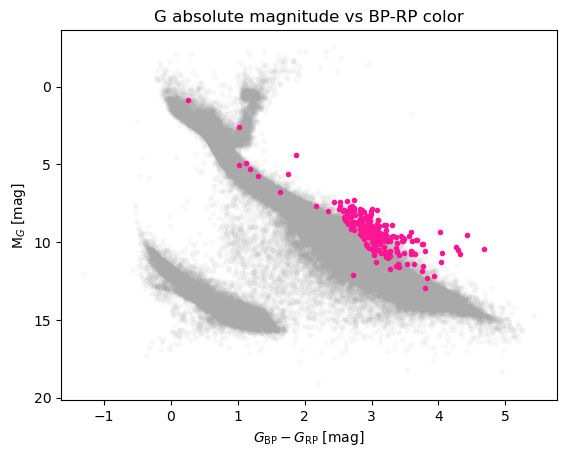

In [21]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.abs_bp_rp,ourtable.g_absmag,marker='.',color=ptcolor)
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
plt.show()

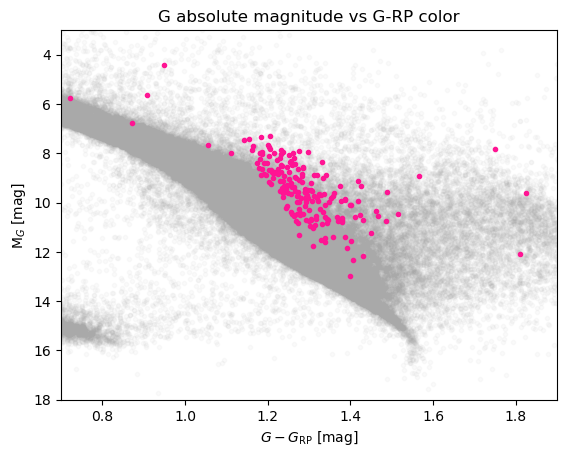

In [22]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.abs_g_rp,ourtable.g_absmag,marker='.',color=ptcolor)
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.show()

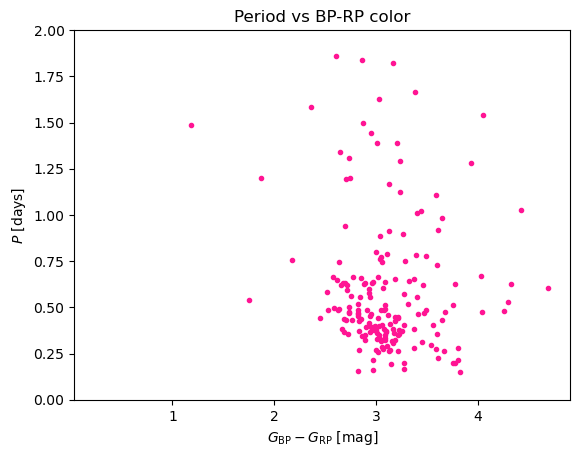

In [23]:
plt.scatter(ourtable.abs_bp_rp,ourtable.per,marker='.',color=ptcolor)
plt.ylabel(r'$P$ [days]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('Period vs BP-RP color')
plt.ylim(0,2) #cutting out some outliers for better visibility
plt.show()

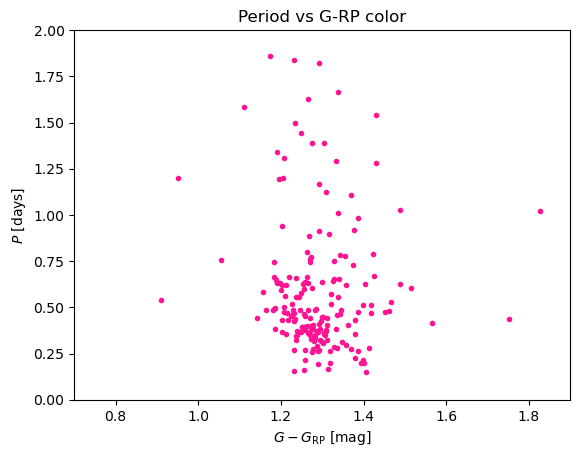

In [24]:
plt.scatter(ourtable.abs_g_rp,ourtable.per,marker='.',color=ptcolor)
plt.ylabel(r'$P$ [days]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('Period vs G-RP color')
plt.xlim(0.7,1.9)
plt.ylim(0,2) #cutting out some outliers for better visibility
plt.show()

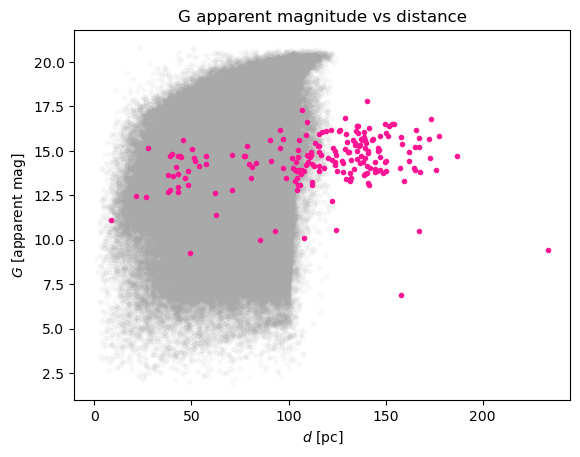

In [25]:
plt.scatter(nearbytable.distance,nearbytable.phot_g_mean_mag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable.distance,ourtable.phot_g_mean_mag,marker='.',color=ptcolor)
plt.ylabel(r'$G$ [apparent mag]') 
plt.xlabel(r'$d$ [pc]')
plt.title('G apparent magnitude vs distance')
plt.show()

In [26]:
#adding log color scale abilities
from matplotlib.ticker import FuncFormatter
import matplotlib.colors as colors

In [27]:
conditions=[ourtable['disco_paper']=='Rebull_2016',
            ourtable['disco_paper']=='Stauffer_2017',
            ourtable['disco_paper']=='Stauffer_2018',
            ourtable['disco_paper']=='Rebull_2018',
            ourtable['disco_paper']=='Zhan_2019',
            ourtable['disco_paper']=='Rebull_2020',
            #ourtable['disco_paper']=='Koen_2020', - don't discover anything
            ourtable['disco_paper']=='Stauffer_2021',
            #ourtable['disco_paper']=='Koen_2021',
            #ourtable['disco_paper']=='Guenther_2022',
            ourtable['disco_paper']=='Rebull_2022',
            #ourtable['disco_paper']=='Koen_2022',
            ourtable['disco_paper']=='Popinchalk_2023',
            ourtable['disco_paper']=='Bouma_2024',
            ourtable['disco_paper']=='Popinchalk_2024']
outcomes=['#00007f', #rebull 1
          '#996300', #stauffer 1
          '#ffa500', #stauffer 2
          '#0000cc', #rebull 2
          '#00ff00', #zhan 1
          '#4c4cff', #rebull 3
          '#ffc966', #stauffer 3
          '#b2b2ff', #rebull 4
          '#b20e66', #popinchalk 1
          '#00ced1', #bouma 1
          '#ff5ab3'] #popinchalk 2
ourtable['color']=np.select(conditions,outcomes)

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_85909/1236764780.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ourtable['color']=np.select(conditions,outcomes)


In [28]:
#first filter out period above 3 for our table
ourtablefilt=ourtable[ourtable['per']<=3]

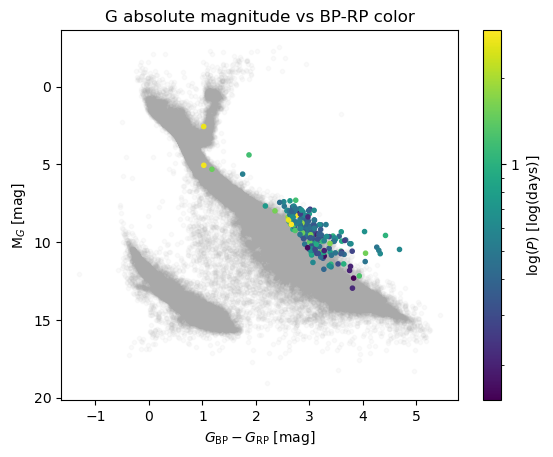

In [29]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtablefilt.abs_bp_rp,ourtablefilt.g_absmag,c=ourtablefilt.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'log($P$) [log(days)]')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}')) #thank you chatgpt
plt.show()

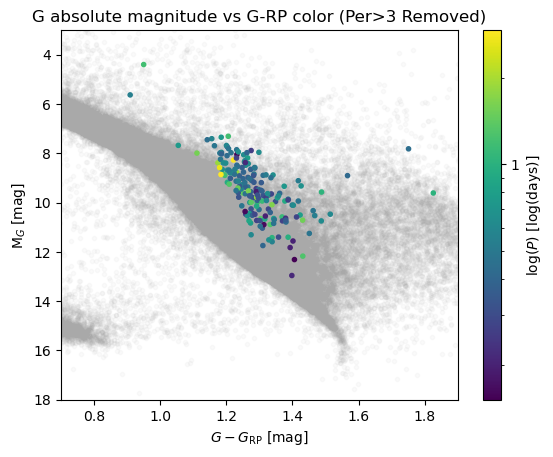

In [30]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtablefilt.abs_g_rp,ourtablefilt.g_absmag,c=ourtablefilt.per,norm=colors.LogNorm(),marker='.')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color (Per>3 Removed)')
plt.xlim(0.7,1.9)
plt.ylim(18,3)
cbar=plt.colorbar()
cbar.ax.set_ylabel(r'log($P$) [log(days)]')
cbar.ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:g}')) #thank you chatgpt
plt.savefig('CMDwithperiods.png')
plt.show()

In [31]:
#okay now repeat CMDs with RUWE color coding
conditions=[ourtable.ruwe<1.4,True]
category=['ruwe<1.4','ruwe>=1.4']
ourtable['ruwecat']=np.select(conditions,category)

/var/folders/zd/14hqhh8n6v122yj77t47nyv40000gn/T/ipykernel_85909/3622421201.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ourtable['ruwecat']=np.select(conditions,category)


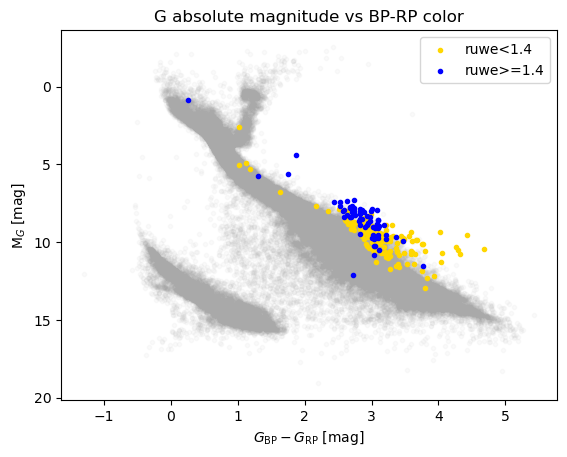

In [32]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.ruwecat=='ruwe<1.4'].abs_bp_rp,ourtable[ourtable.ruwecat=='ruwe<1.4'].g_absmag,marker='.',color='gold',label='ruwe<1.4')
plt.scatter(ourtable[ourtable.ruwecat=='ruwe>=1.4'].abs_bp_rp,ourtable[ourtable.ruwecat=='ruwe>=1.4'].g_absmag,marker='.',color='blue',label='ruwe>=1.4')
#blue dots are unresolved binaries so makes sense that they are brighter typically
#eventually improve way of showing dots so the blue ones aren't covering the gold
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
plt.legend()
plt.show()

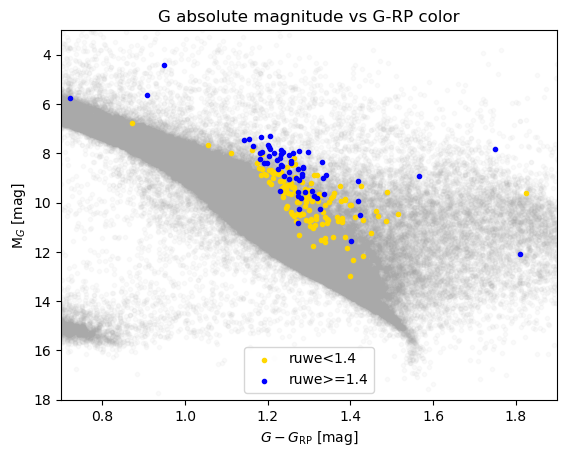

In [33]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.ruwecat=='ruwe<1.4'].abs_g_rp,ourtable[ourtable.ruwecat=='ruwe<1.4'].g_absmag,marker='.',color='gold',label='ruwe<1.4')
plt.scatter(ourtable[ourtable.ruwecat=='ruwe>=1.4'].abs_g_rp,ourtable[ourtable.ruwecat=='ruwe>=1.4'].g_absmag,marker='.',color='blue',label='ruwe>=1.4')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.title('G absolute magnitude vs G-RP color')
plt.legend()
plt.show()

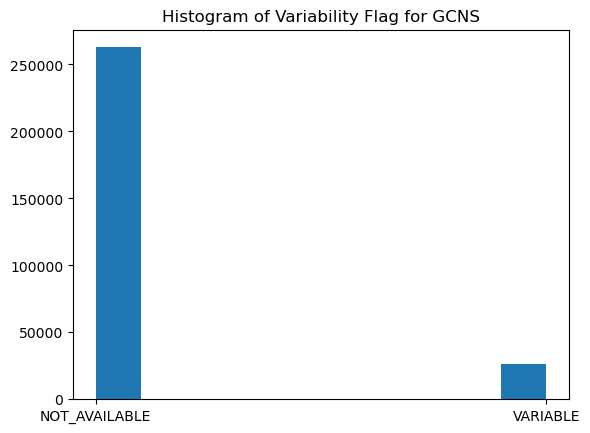

In [34]:
plt.hist(nearbytable['phot_variable_flag'])
plt.title('Histogram of Variability Flag for GCNS')
plt.show()

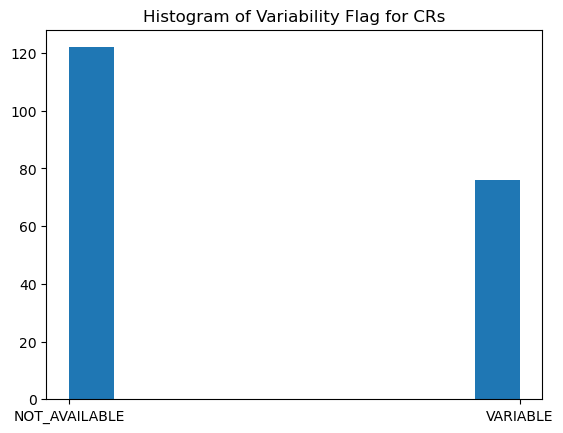

In [35]:
plt.hist(ourtable['phot_variable_flag'])
plt.title('Histogram of Variability Flag for CRs')
plt.show()

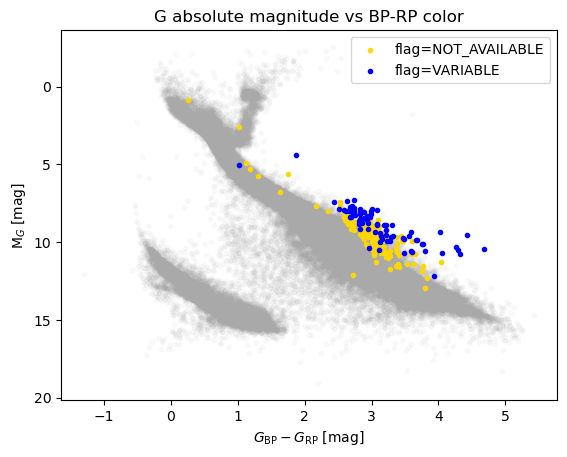

In [36]:
plt.scatter(nearbytable.abs_bp_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.phot_variable_flag=='NOT_AVAILABLE'].abs_bp_rp,ourtable[ourtable.phot_variable_flag=='NOT_AVAILABLE'].g_absmag,marker='.',color='gold',label='flag=NOT_AVAILABLE')
plt.scatter(ourtable[ourtable.phot_variable_flag=='VARIABLE'].abs_bp_rp,ourtable[ourtable.phot_variable_flag=='VARIABLE'].g_absmag,marker='.',color='blue',label='flag=VARIABLE')
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G_{\text{BP}}-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs BP-RP color')
plt.legend()
plt.show()

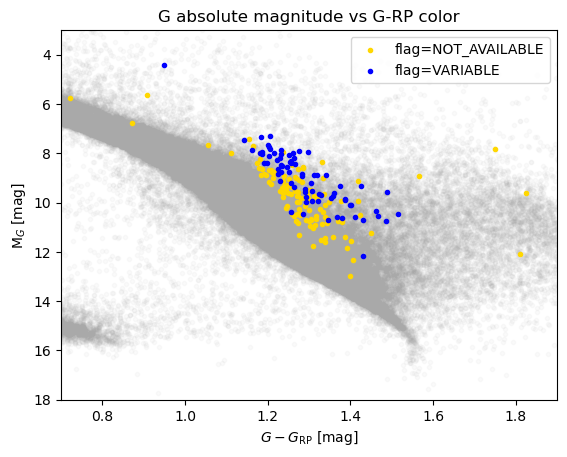

In [37]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
plt.scatter(ourtable[ourtable.phot_variable_flag=='NOT_AVAILABLE'].abs_g_rp,ourtable[ourtable.phot_variable_flag=='NOT_AVAILABLE'].g_absmag,marker='.',color='gold',label='flag=NOT_AVAILABLE')
plt.scatter(ourtable[ourtable.phot_variable_flag=='VARIABLE'].abs_g_rp,ourtable[ourtable.phot_variable_flag=='VARIABLE'].g_absmag,marker='.',color='blue',label='flag=VARIABLE')
plt.gca().invert_yaxis()
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.legend()
plt.show()

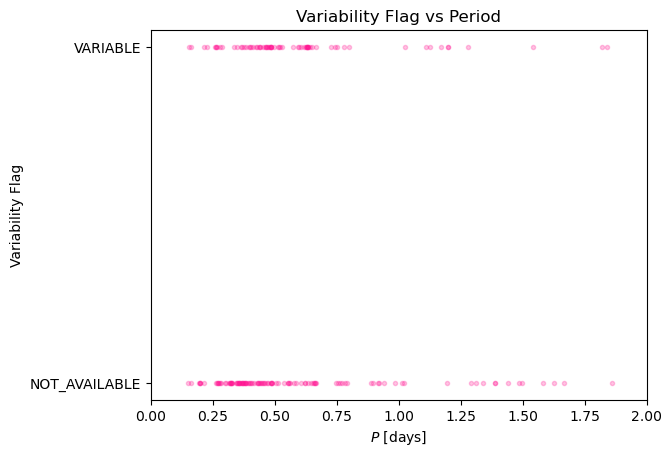

In [38]:
plt.scatter(ourtable.per,ourtable.phot_variable_flag,marker='.',color=ptcolor,alpha=0.25)
plt.ylabel(r'Variability Flag')
plt.xlabel(r'$P$ [days]')
plt.title('Variability Flag vs Period')
plt.xlim(0,2) #cutting out some outliers for better visibility
plt.show()

In [39]:
papers=['Rebull_2016',
            'Stauffer_2017',
            'Stauffer_2018',
            'Rebull_2018',
            'Zhan_2019',
            'Rebull_2020',
            #ourtable['disco_paper']=='Koen_2020', - don't discover anything
            'Stauffer_2021',
            #ourtable['disco_paper']=='Koen_2021',
            #ourtable['disco_paper']=='Guenther_2022',
            'Rebull_2022',
            #ourtable['disco_paper']=='Koen_2022',
            'Popinchalk_2023',
            'Bouma_2024',
            'Popinchalk_2024']

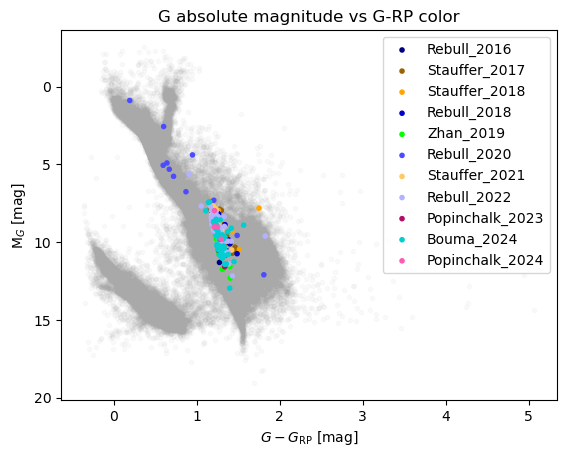

In [40]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
for paper in papers:
    curtable=ourtable[ourtable.disco_paper==paper]
    plt.scatter(curtable.abs_g_rp,curtable.g_absmag,marker='.',label=paper,color=curtable.color)
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.title('G absolute magnitude vs G-RP color')
plt.legend()
plt.show()

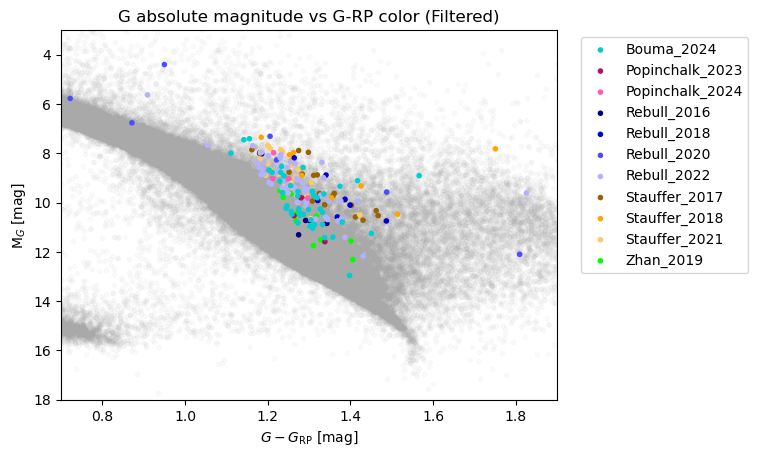

In [41]:
plt.scatter(nearbytable.abs_g_rp,nearbytable.g_absmag,marker='.',color='darkgray',alpha=0.05)
for paper in papers:
    curtable=ourtable[ourtable.disco_paper==paper]
    plt.scatter(curtable.abs_g_rp,curtable.g_absmag,marker='.',label=paper,color=curtable.color)
plt.gca().invert_yaxis()
plt.ylabel(r'M$_G$ [mag]')
plt.xlabel(r'$G-G_{\text{RP}}$ [mag]')
plt.xlim(0.7,1.9)
plt.ylim(18,3)
plt.title('G absolute magnitude vs G-RP color (Filtered)')
handles, labels = plt.gca().get_legend_handles_labels()
unique = dict(zip(labels, handles))
sorted_items = sorted(unique.items(), key=lambda item: item[0])
sorted_labels, sorted_handles = zip(*sorted_items)
plt.legend(sorted_handles, sorted_labels, loc='upper right',bbox_to_anchor=(1.4,1))
plt.savefig('CMDwithpapers.png')
plt.show()

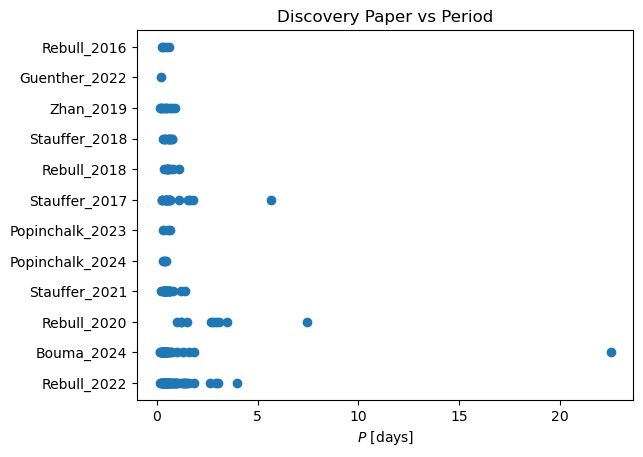

In [42]:
plt.scatter(ourtable.per,ourtable.disco_paper)
plt.xlabel(r'$P$ [days]')
plt.title('Discovery Paper vs Period')
plt.show()

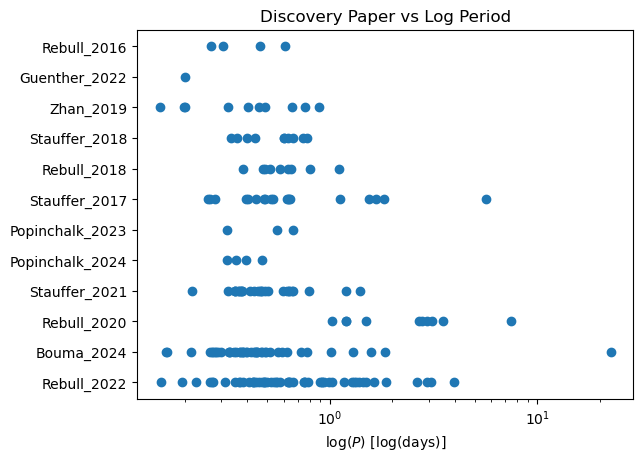

In [43]:
plt.scatter(ourtable.per,ourtable.disco_paper)
plt.xscale('log')
plt.xlabel(r'log($P$) [log(days)]')
plt.title('Discovery Paper vs Log Period')
plt.show()

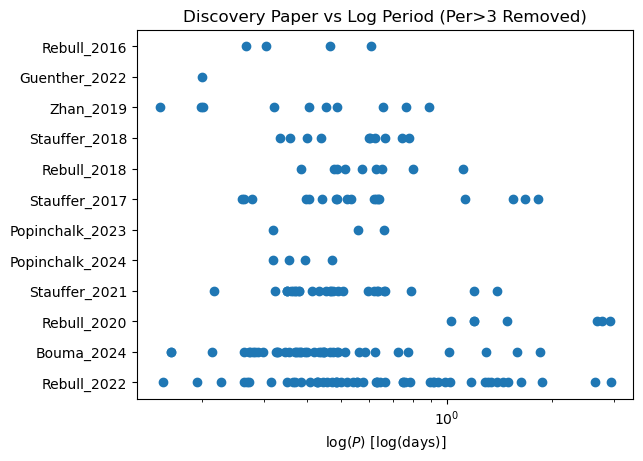

In [44]:
plt.scatter(ourtablefilt.per,ourtablefilt.disco_paper)
plt.xscale('log')
plt.xlabel(r'log($P$) [log(days)]')
plt.title('Discovery Paper vs Log Period (Per>3 Removed)')
plt.show()